# PCA Derivation: Projection Perspective

## Setting and Objective

Assume an ordered orthonormal basis (ONB) $ B = (b_1, \ldots, b_D) $ of $ \mathbb{R}^D $. Any vector $ \vec{x} $ in $ \mathbb{R}^D $ can be expressed as a linear combination of the basis vectors:

$$ \bm{x} = \sum_{d=1}^D \bm{z}_d b_d = \sum_{m=1}^M \bm{z}_m b_m + \sum_{j=M+1}^D \bm{z}_j b_j$$

We aim to find vectors $ \bm{\widetilde{x}_n} $ in a lower-dimensional subspace $ U $ of dimension $ M $ that are as similar as possible to $ \vec{x} $:

$$ \bm{\widetilde{x}} = \sum_{m=1}^M \bm{z}_m b_m$$

in other words:
$$\min_{\bm{z}, b} \frac{1}{N} \sum_{n=1}^N \|\bm{x}_n - \bm{\widetilde{x}}_n\|^2 $$

The projections of datapoints are denoted by
$$  \bm{\widetilde{x}}_n := \sum_{m=1}^M \bm{z}_{mn} b_m = \bm{B}\bm{z}_n$$

In matrix form, if $\bm{X} \in  \mathbb{R}^{N \times D}$ then we expect $\bm{B} \in  \mathbb{R}^{D \times M}$ and $\bm{Z} \in  \mathbb{R}^{N \times M}$, so:
$$\widetilde{\bm{X}} = \bm{Z} \bm{B}^\top $$

## Finding projection coordinates

The objective is to minimize the average squared Euclidean distance between $ \vec{x} $ and $ \vec{x}_\text{proj} $:

$$ J_M = \frac{1}{N} \sum_{n=1}^N \|\bm{x}_n - \bm{\widetilde{x}}_n\|^2 $$

Lets calculate the derivatives:   
$$
\begin{align*}
\frac{\partial J_M}{\partial \bm{z}_{in}} &= \frac{\partial J_M}{\partial \widetilde{x}_n} \cdot \frac{\partial \widetilde{x}_n}{\partial z_n}\\
\frac{\partial J_M}{\partial \widetilde{x}_n} &= - \frac{2}{N}(x_n - \widetilde{x}_n)^\top \in \mathbb{R}^{1 \times D}\\
\frac{\widetilde{x}_n}{\partial \bm{z}_{in}} &= \frac{\partial}{\partial \widetilde{x}_n} \left( \sum_{m=1}^M \bm{z}_{mn} b_m\right) = b_i\\
\frac{\partial J_M}{\partial \bm{z}_{in}} &= - \frac{2}{N}(x_n - \widetilde{x}_n)^\top b_i \\
&= - \frac{2}{N}(x_n - \sum_{m=1}^M \bm{z}_{mn} b_m)^\top b_i\\
&= - \frac{2}{N}(x_n^\top b_i - \bm{z}_{in} b_i^\top b_i) \\
&= - \frac{2}{N}(x_n^\top b_i - \bm{z}_{in}) \\
\end{align*}
$$

From where we get:
$$\bm{z}_{in} = x_n^\top b_i = b_i^\top x_n$$

In matrix form, if $\bm{X} \in  \mathbb{R}^{N \times D}$ then we expect $\bm{B} \in  \mathbb{R}^{D \times M}$ and $\bm{Z} \in  \mathbb{R}^{N \times M}$, so:
$$\bm{Z} = \bm{X} \bm{B}$$

And projection:  
$$\widetilde{\bm{X}} = \bm{Z} \bm{B}^\top = \bm{X} \bm{B} \bm{B}^\top$$
## Finding Basis

Given loss function:  
$$ J_M = \frac{1}{N} \sum_{n=1}^N \|\bm{x}_n - \bm{\widetilde{x}}_n\|^2 $$

And our projection:
$$  \bm{\widetilde{x}}_n = \sum_{m=1}^M \bm{z}_{mn} b_m = \bm{B}\bm{z}_n$$  

We have:


$$
\begin{align*}
J_m &=  \frac{1}{N} \sum_{n=1}^N \Vert \bm{x}_n - \bm{\widetilde{x}}_n\Vert^2\\
&= \frac{1}{N} \sum_{n=1}^N \Vert\sum_{m=1}^M \bm{z}_m b_m + \sum_{j=M+1}^D \bm{z}_j b_j - \sum_{m=1}^M \bm{z}_m b_m \Vert^2\\
&= \frac{1}{N} \sum_{n=1}^N \Vert \sum_{j=M+1}^D \bm{z}_j b_j  \Vert^2\\
&= \frac{1}{N} \sum_{n=1}^N \Vert \sum_{j=M+1}^D b_j^\top x_n b_j  \Vert^2\\
&=\frac 1 N\sum_{i=1}^N \left \Vert \left( \sum_{j=M+1}^D \bm b_j^\top x_n \right)\bm b_j \right \Vert^2\\
&=\frac 1 N\sum_{i=1}^N   \sum_{j=M+1}^D \left( \bm b_j^\top x_n \right)^2\\
&=\frac 1 N\sum_{i=1}^N   \sum_{j=M+1}^D \bm b_j^\top x_n x_n^\top \bm b_j\\
&=\sum_{j=M+1}^D   \bm b_j^\top \left(  \frac 1 N\sum_{i=1}^N    x_n x_n^\top \right) \bm b_j \\
&=\sum_{j=M+1}^D   \bm b_j^\top   \bm{S} \bm b_j \\
\end{align*}
$$

We can see that $\bm{b_i}$ is eigenvector of $\bm{S}$, for more details:  (see p.6 of https://arxiv.org/pdf/1404.1100.pdf)

In matrix form, if $\bm{X} \in  \mathbb{R}^{N \times D}$ then we expect $\bm{S} \in  \mathbb{R}^{D \times D}$, so:
$$\bm{S} = \bm{X}^\top \bm{X}$$
## Eigenvalue Problem

To minimize the average squared reconstruction error, we need to select the smallest $ D - M $ eigenvalues of the data covariance matrix, corresponding to the basis of the orthogonal complement. The basis of the principal subspace is formed by the eigenvectors associated with the largest $ M $ eigenvalues.

In summary, PCA from the projection perspective seeks to find the best linear projection onto a lower-dimensional subspace by minimizing the average squared Euclidean distance. The optimal coordinates, basis vectors, and projection are determined through orthogonal projections and eigenvalue analysis.

### Implementation:

Also could be found in:  
```
.\mllib\pca.py
```

In [41]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA as SKPCA
import matplotlib.pyplot as plt


class PCA:
    """
    Principal Component Analysis (PCA) class.

    Parameters:
    - n_components (int): Number of principal components to retain.

    Attributes:
    - n_components (int): Number of principal components to retain.
    - components (ndarray or None): Principal components obtained after fitting.
    - mean (ndarray or None): Mean of the input data used for standardization.
    """

    def __init__(self, n_components: int):
        """
        Initialize PCA with the specified number of components.

        Parameters:
        - n_components (int): Number of principal components to retain.
        """
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = 0

    def _standardize(self, X: np.ndarray) -> np.ndarray:
        """
        Standardize the input data.

        Parameters:
        - X (ndarray): Input data.

        Returns:
        - ndarray: Standardized data.
        """
        return X - self.mean

    def _swap_signs(self, M: np.ndarray) -> np.ndarray:
        """
        Swap signs of the columns of the matrix based on the column with maximum absolute value.

        Parameters:
        - M (ndarray): Input matrix.

        Returns:
        - ndarray: Matrix with signs swapped.
        """
        max_abs_cols = np.argmax(np.abs(M), axis=0)
        signs = np.sign(M[max_abs_cols, range(M.shape[1])])
        M *= signs
        return M

    def fit(self, X: np.ndarray):
        """
        Fit the PCA model to the input data.

        Parameters:
        - X (ndarray): Input data.
        """
        self.mean = np.mean(X, axis=0)
        X_standardized = self._standardize(X)

        S = X_standardized.T @ X_standardized / (X.shape[0] - 1)

        eigenvalues, eigenvectors = np.linalg.eig(S)

        # Sort eigenvectors by eigenvalues in descending order
        sorted_idxs = np.argsort(eigenvalues)[::-1]
        self.components = self._swap_signs(eigenvectors[:, sorted_idxs[:self.n_components]])
        total_variance = np.sum(eigenvalues)
        self.explained_variance = np.sum(eigenvalues[sorted_idxs[:self.n_components]])/total_variance

    def transform(self, X: np.ndarray) -> np.ndarray:
        """
        Transform the input data using the fitted PCA model.

        Parameters:
        - X (ndarray): Input data.

        Returns:
        - ndarray: Transformed data.
        """
        if self.components is None:
            raise Exception("Call fit method first!")

        X_standardized = self._standardize(X)
        return np.dot(X_standardized, self.components)

    def fit_transform(self, X: np.ndarray) -> np.ndarray:
        """
        Fit the PCA model to the input data and transform it.

        Parameters:
        - X (ndarray): Input data.

        Returns:
        - ndarray: Transformed data.
        """
        self.fit(X)
        return self.transform(X)

Dimensions of X: (150, 4)


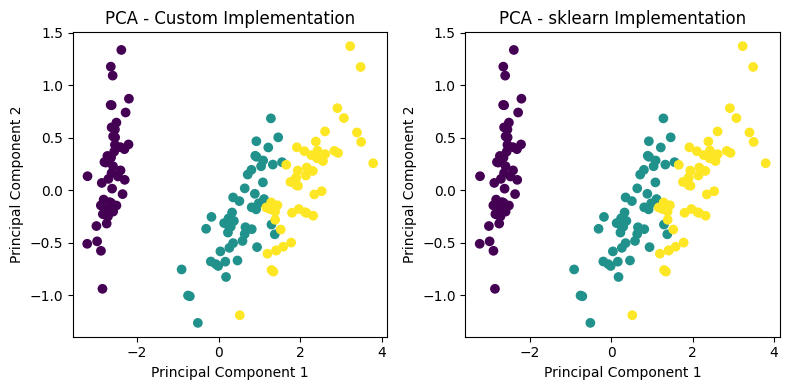

In [42]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA as SKPCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(f'Dimensions of X: {X.shape}')
# Using your PCA implementation
my_pca = PCA(n_components=2)
my_result = my_pca.fit_transform(X)

# Using sklearn PCA for comparison
sk_pca = SKPCA(n_components=2)
sk_result = sk_pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(my_result[:, 0], my_result[:, 1], c=y, cmap='viridis')
plt.title('PCA - Custom Implementation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(sk_result[:, 0], sk_result[:, 1], c=y, cmap='viridis')
plt.title('PCA - sklearn Implementation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.tight_layout()
plt.show()


### Eigenfaces

https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_eigenfaces.html

In [4]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/mikhail/scikit_learn_data


(400, 4096)

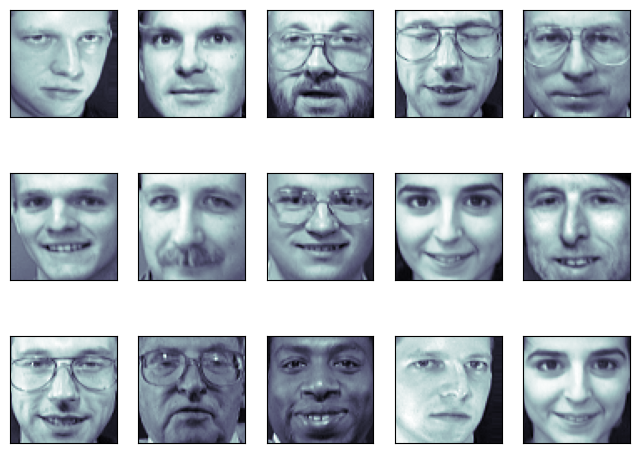

In [90]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[np.random.randint(0, faces.data.shape[0])], cmap=plt.cm.bone)


In [91]:
print(faces.data.shape)
print(faces.images.shape)

(400, 4096)
(400, 64, 64)


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

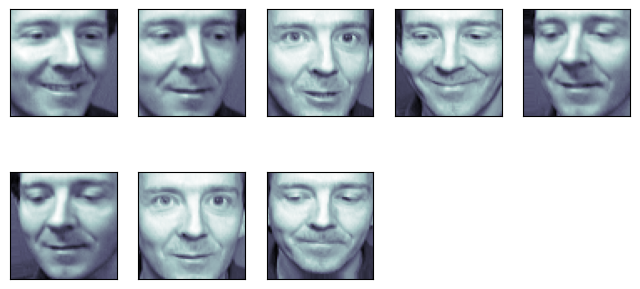

In [93]:
d = X_train[y_train == 2].reshape(-1, 64, 64)
fig = plt.figure(figsize=(8, 6))
for i, face in enumerate(d):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(face, cmap=plt.cm.bone)

In [94]:
pca = PCA(n_components=15)
pca.fit(X_train)
print(f'Explained variance: {pca.explained_variance}')


Explained variance: 0.7231658101081848


In [95]:
components = pca.components.T

Lets plot principial components:

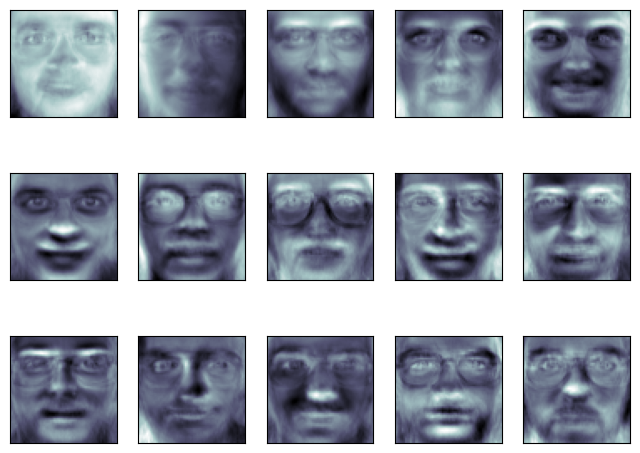

In [96]:
fig = plt.figure(figsize=(8, 6))
for i in range(len(components)):
    ax = fig.add_subplot(3, int(np.ceil(len(components)/3)), i + 1, xticks=[], yticks=[])
    ax.imshow(components[i].reshape(64, 64), cmap=plt.cm.bone)

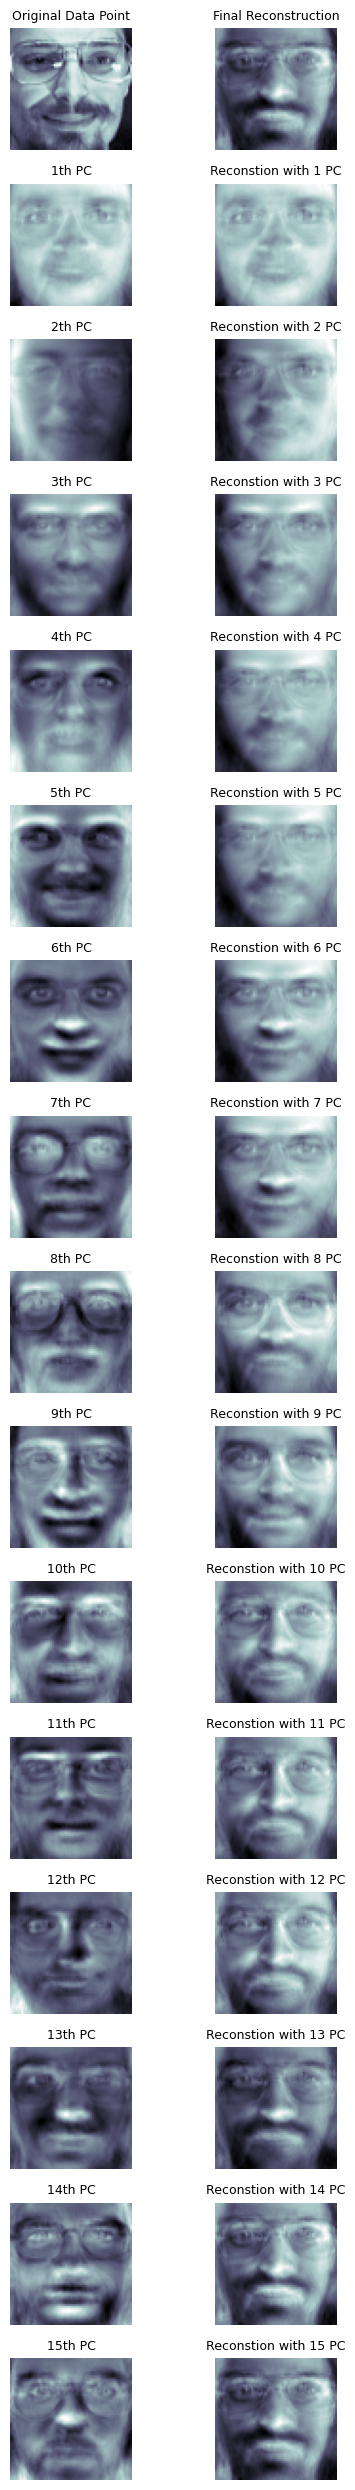

In [143]:
import matplotlib.pyplot as plt

def project_reconstruct():
    n = X_train.shape[0]
    data_point = X_train[np.random.randint(0, n)]
     # Reconstructed data point
    z = pca.transform([data_point])
    components = pca.components.T
    recon = z @ components

    n = len(components)
    fig, axes = plt.subplots(n+1, 2, figsize=(5, 25))


    # Original data point
    axes[0, 0].imshow(data_point.reshape(64, 64), cmap=plt.cm.bone)
    axes[0, 0].set_title('Original Data Point', fontsize=9)
    axes[0, 0].axis('off')

    axes[0, 1].imshow(recon.reshape(64, 64), cmap=plt.cm.bone)
    axes[0, 1].set_title('Final Reconstruction', fontsize=9)
    axes[0, 1].axis('off')

    k = len(components)
    reconstruction_i = np.zeros((64, 64))

    for i in range(k):
        temp = z[0][i] * components[i]
        reconstruction_i += temp.reshape(64, 64)

        # Component and reconstructed image
        axes[i+1, 0].imshow(components[i].reshape(64, 64), cmap=plt.cm.bone)
        axes[i+1, 0].set_title(f'{i+1}th PC', fontsize=9)
        axes[i+1, 0].axis('off')

        axes[i+1, 1].imshow(reconstruction_i, cmap=plt.cm.bone)
        axes[i+1, 1].set_title(f'Reconstion with {i+1} PC', fontsize=9)
        axes[i+1, 1].axis('off')

    plt.tight_layout()

project_reconstruct()
